In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))

for l in range(20):
    model.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))

model.add(keras.layers.Dense(10, activation="softmax"))

In [3]:
cifar10 = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

In [4]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [5]:
(X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape)

((45000, 32, 32, 3),
 (5000, 32, 32, 3),
 (10000, 32, 32, 3),
 (45000, 1),
 (5000, 1),
 (10000, 1))

In [6]:
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [7]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_valid = keras.utils.to_categorical(y_valid, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [8]:
model.compile(optimizer=optimizer,
              metrics=["accuracy"],
              loss="categorical_crossentropy")

In [9]:
history1 = model.fit(X_train, y_train, epochs=500,
                     validation_data=(X_valid, y_valid),
                     callbacks=[early_stopping_cb])

Train on 45000 samples, validate on 5000 samples
Epoch 1/500
45000/45000 [==============================] - 19s 428us/sample - loss: 2.0820 - accuracy: 0.2409 - val_loss: 1.9513 - val_accuracy: 0.2780
Epoch 2/500
45000/45000 [==============================] - 13s 284us/sample - loss: 1.8566 - accuracy: 0.3241 - val_loss: 1.9134 - val_accuracy: 0.2804
Epoch 3/500
45000/45000 [==============================] - 14s 312us/sample - loss: 1.7795 - accuracy: 0.3580 - val_loss: 1.8230 - val_accuracy: 0.3372
Epoch 4/500
45000/45000 [==============================] - 17s 377us/sample - loss: 1.7279 - accuracy: 0.3810 - val_loss: 1.6975 - val_accuracy: 0.3892
Epoch 5/500
45000/45000 [==============================] - 17s 378us/sample - loss: 1.7243 - accuracy: 0.3779 - val_loss: 1.8313 - val_accuracy: 0.3534
Epoch 6/500
45000/45000 [==============================] - 16s 350us/sample - loss: 1.6766 - accuracy: 0.4048 - val_loss: 1.7260 - val_accuracy: 0.3840
Epoch 7/500
45000/45000 [==============

In [10]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape=[32,32,3]))
model2.add(keras.layers.BatchNormalization())

for l in range(20):
    model2.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
    model2.add(keras.layers.BatchNormalization())

model2.add(keras.layers.Dense(10, activation="softmax"))

In [11]:
model2.compile(optimizer=optimizer,
              metrics=["accuracy"],
              loss="categorical_crossentropy")

In [12]:
history2 = model2.fit(X_train, y_train, epochs=500,
                     validation_data=(X_valid, y_valid),
                     callbacks=[early_stopping_cb])

Train on 45000 samples, validate on 5000 samples
Epoch 1/500
45000/45000 [==============================] - 35s 771us/sample - loss: 1.9327 - accuracy: 0.2938 - val_loss: 1.7646 - val_accuracy: 0.3510
Epoch 2/500
45000/45000 [==============================] - 25s 553us/sample - loss: 1.7491 - accuracy: 0.3678 - val_loss: 1.6490 - val_accuracy: 0.4056
Epoch 3/500
45000/45000 [==============================] - 26s 578us/sample - loss: 1.6586 - accuracy: 0.4079 - val_loss: 1.5925 - val_accuracy: 0.4370
Epoch 4/500
45000/45000 [==============================] - 25s 562us/sample - loss: 1.5957 - accuracy: 0.4318 - val_loss: 1.5177 - val_accuracy: 0.4562
Epoch 5/500
45000/45000 [==============================] - 25s 559us/sample - loss: 1.5523 - accuracy: 0.4494 - val_loss: 1.4672 - val_accuracy: 0.4806
Epoch 6/500
45000/45000 [==============================] - 26s 571us/sample - loss: 1.5152 - accuracy: 0.4635 - val_loss: 1.4483 - val_accuracy: 0.4824
Epoch 7/500
45000/45000 [==============

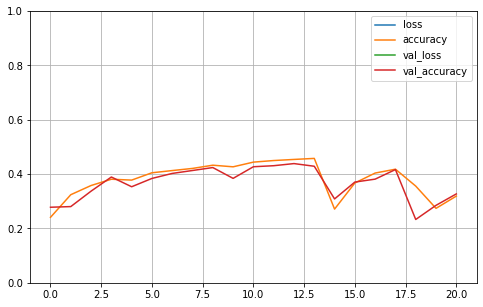

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.DataFrame(history1.history).plot(figsize=(8,5))
plt.grid(True)
plt.ylim(0, 1)
plt.show()

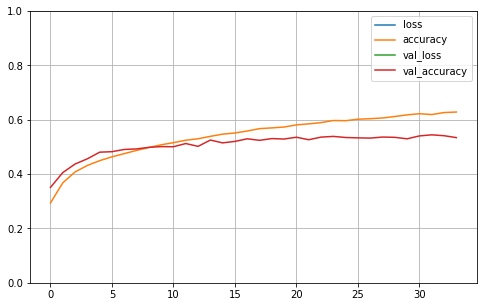

In [25]:
pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.grid(True)
plt.ylim(0, 1)
plt.show()

In [8]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [10]:
model3 = keras.models.Sequential()
model3.add(keras.layers.Flatten(input_shape=[32,32,3]))

for l in range(20):
    model3.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))

model3.add(keras.layers.Dense(10, activation="softmax"))

In [11]:
model3.compile(optimizer=optimizer,
               metrics=["accuracy"],
               loss="categorical_crossentropy")
history3 = model3.fit(X_train_scaled, y_train, epochs=500,
                     validation_data=(X_valid_scaled, y_valid),
                     callbacks=[early_stopping_cb])

Train on 45000 samples, validate on 5000 samples
Epoch 1/500
45000/45000 [==============================] - 21s 469us/sample - loss: 1.9831 - accuracy: 0.2799 - val_loss: 1.9510 - val_accuracy: 0.3250
Epoch 2/500
45000/45000 [==============================] - 17s 368us/sample - loss: 1.7640 - accuracy: 0.3690 - val_loss: 1.8353 - val_accuracy: 0.3400
Epoch 3/500
45000/45000 [==============================] - 20s 447us/sample - loss: 1.6727 - accuracy: 0.4075 - val_loss: 1.8403 - val_accuracy: 0.3490
Epoch 4/500
45000/45000 [==============================] - 23s 510us/sample - loss: 1.6054 - accuracy: 0.4318 - val_loss: 1.6142 - val_accuracy: 0.4262
Epoch 5/500
45000/45000 [==============================] - 20s 446us/sample - loss: 1.5489 - accuracy: 0.4515 - val_loss: 1.5997 - val_accuracy: 0.4314
Epoch 6/500
45000/45000 [==============================] - 17s 377us/sample - loss: 1.5140 - accuracy: 0.4640 - val_loss: 1.6287 - val_accuracy: 0.4322
Epoch 7/500
45000/45000 [==============

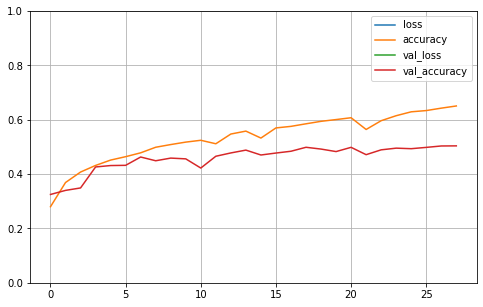

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.DataFrame(history3.history).plot(figsize=(8,5))
plt.grid(True)
plt.ylim(0, 1)
plt.show()

In [9]:
model4 = keras.models.Sequential()
model4.add(keras.layers.Flatten(input_shape=[32,32,3]))
model4.add(keras.layers.AlphaDropout(rate=0.1))

for l in range(20):
    model4.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
    model4.add(keras.layers.AlphaDropout(rate=0.1))

model4.add(keras.layers.Dense(10, activation="softmax"))

In [10]:
model4.compile(optimizer=optimizer,
               metrics=["accuracy"],
               loss="categorical_crossentropy")
history4 = model4.fit(X_train_scaled, y_train, epochs=500,
                     validation_data=(X_valid_scaled, y_valid),
                     callbacks=[early_stopping_cb])

Train on 45000 samples, validate on 5000 samples
Epoch 1/500
45000/45000 [==============================] - 28s 626us/sample - loss: 2.1297 - accuracy: 0.2026 - val_loss: 5.1366 - val_accuracy: 0.2566
Epoch 2/500
45000/45000 [==============================] - 24s 527us/sample - loss: 1.9437 - accuracy: 0.2569 - val_loss: 10.5785 - val_accuracy: 0.2392
Epoch 3/500
45000/45000 [==============================] - 23s 507us/sample - loss: 1.9080 - accuracy: 0.2777 - val_loss: 6.0868 - val_accuracy: 0.2698
Epoch 4/500
45000/45000 [==============================] - 20s 453us/sample - loss: 1.8794 - accuracy: 0.2948 - val_loss: 5.4643 - val_accuracy: 0.3010
Epoch 5/500
45000/45000 [==============================] - 20s 455us/sample - loss: 1.8716 - accuracy: 0.2993 - val_loss: 11.2446 - val_accuracy: 0.2794
Epoch 6/500
45000/45000 [==============================] - 20s 453us/sample - loss: 1.8564 - accuracy: 0.3018 - val_loss: 6.9908 - val_accuracy: 0.3142
Epoch 7/500
45000/45000 [============

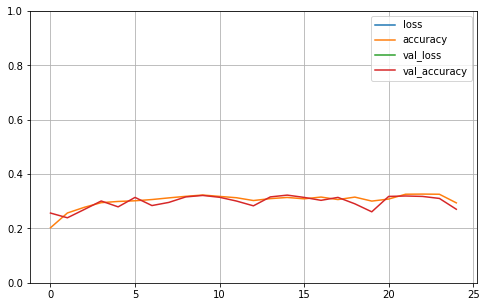

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.DataFrame(history4.history).plot(figsize=(8,5))
plt.grid(True)
plt.ylim(0, 1)
plt.show()

In [14]:
import numpy as np

y_pred_alpha = model4(X_test_scaled)
accuracy_alpha_dropout = np.sum(y_pred_alpha == y_test) / len(X_test)
print("alpha dropout accuracy: " + str(accuracy_alpha_dropout))

alpha dropout accuracy: 0.0751


In [ ]:
y_probas = np.stack([model4(X_test_scaled, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_pred = np.argmax(y_proba, axis=1)

In [ ]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = len(X) // batch_size * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")